In [85]:
import subprocess

type = "Edges"
if type == "Adj":
    Heading = "Adjacency List"
else:
    Heading = "Edge List"

filename = 'Parallel-Boruvka-' + type
cpp_filename = filename + '.cpp'
executable_filename = filename + '.o'
results_filename = filename + '.results'

# Compile the C++ file
compile_command = f"g++ -std=c++17 -o {executable_filename} {cpp_filename}"
try:
    subprocess.run(compile_command, shell=True, check=True)
    print("Compilation successful!")
except subprocess.CalledProcessError as e:
    print(f"Compilation failed with error: {e}")
    exit(1)


Compilation successful!


In [86]:
# Define the inputs and thread counts
input_values = [1000, 2000, 3000, 4000, 5000]
threads = [1, 2, 4, 8, 16, 32]

# Create or clear the results file
with open(results_filename, 'w') as file:
    file.write("")

# Run the tests
for input_size in input_values:
    for thread in threads:
        print(f"Running for input {input_size} with {thread} threads...")

        # Write the header for this input/thread pair
        with open(results_filename, 'a') as file:
            file.write(f"Input: {input_size}, Threads: {thread}\n")

        # Initialize sum for milliseconds
        total_ms = 0

        # Run 5 times
        for run in range(1, 6):
            print(f"  Run {run}...")

            # Run the program and capture the output
            result = subprocess.run(
                ['./' + executable_filename, str(input_size), str(thread)],  # Use the variable here
                capture_output=True, text=True
            )

            output = result.stdout
            # Extract the last two lines
            last_two_lines = "\n".join(output.splitlines()[-2:])

            # Write the run output to file
            with open(results_filename, 'a') as file:
                file.write(f"Run {run}:\n")
                file.write(f"{last_two_lines}\n")

            # Extract milliseconds value
            ms_line = [line for line in last_two_lines.splitlines() if 'milliseconds' in line][0]
            ms = float(ms_line.split()[5])

            # Accumulate the sum of milliseconds
            total_ms += ms

        # Calculate the average time in milliseconds
        avg_ms = total_ms / 5

        # Write averages to file
        with open(results_filename, 'a') as file:
            file.write(f"Average Time to build MST: {avg_ms:.5f} milliseconds\n")
            file.write("-----------------------------------\n")

print(f"All runs complete. Results saved to {results_filename}.")


Running for input 1000 with 1 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 1000 with 2 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 1000 with 4 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 1000 with 8 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 1000 with 16 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 1000 with 32 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 2000 with 1 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 2000 with 2 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 2000 with 4 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 2000 with 8 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 2000 with 16 threads

In [87]:
import matplotlib.pyplot as plt

# Define the input sizes and thread counts
input_sizes = [1000, 2000, 3000, 4000, 5000]
thread_counts = [1, 2, 4, 8, 16, 32]

# Initialize a dictionary to store average times in milliseconds
# The list length for each input size matches the number of thread counts
avg_times_ms = {input_size: [0] * len(thread_counts) for input_size in input_sizes}

# Read the results.txt file
with open(results_filename, 'r') as file:
    lines = file.readlines()

current_input = None
current_thread = None

for line in lines:
    line = line.strip()

    # Detect the input and thread count
    if line.startswith('Input:'):
        parts = line.split(',')
        current_input = int(parts[0].split(':')[1].strip())
        current_thread = int(parts[1].split(':')[1].strip())

    # Extract the average time for MST in milliseconds
    if line.startswith('Average Time to build MST:') and 'milliseconds' in line:
        avg_ms = float(line.split(':')[1].split()[0])

        # Adjust indexing to correctly assign average times
        thread_index = thread_counts.index(current_thread)  # Find the index for the thread count
        avg_times_ms[current_input][thread_index] = avg_ms
        print(f"Input: {current_input}, Threads: {current_thread}, Avg Time: {avg_ms:.5f} ms")

print("Average times in milliseconds:")
for input_size, times in avg_times_ms.items():
    print(f"Input Size: {input_size}, Average Times: {times}")


Input: 1000, Threads: 1, Avg Time: 3.35381 ms
Input: 1000, Threads: 2, Avg Time: 2.01628 ms
Input: 1000, Threads: 4, Avg Time: 1.75003 ms
Input: 1000, Threads: 8, Avg Time: 1.92686 ms
Input: 1000, Threads: 16, Avg Time: 2.56081 ms
Input: 1000, Threads: 32, Avg Time: 3.69388 ms
Input: 2000, Threads: 1, Avg Time: 4.68718 ms
Input: 2000, Threads: 2, Avg Time: 3.42636 ms
Input: 2000, Threads: 4, Avg Time: 2.77816 ms
Input: 2000, Threads: 8, Avg Time: 3.14218 ms
Input: 2000, Threads: 16, Avg Time: 3.94935 ms
Input: 2000, Threads: 32, Avg Time: 5.44353 ms
Input: 3000, Threads: 1, Avg Time: 6.77952 ms
Input: 3000, Threads: 2, Avg Time: 4.80057 ms
Input: 3000, Threads: 4, Avg Time: 3.71227 ms
Input: 3000, Threads: 8, Avg Time: 4.44297 ms
Input: 3000, Threads: 16, Avg Time: 5.38501 ms
Input: 3000, Threads: 32, Avg Time: 6.91044 ms
Input: 4000, Threads: 1, Avg Time: 9.01746 ms
Input: 4000, Threads: 2, Avg Time: 6.43374 ms
Input: 4000, Threads: 4, Avg Time: 4.60832 ms
Input: 4000, Threads: 8, Avg

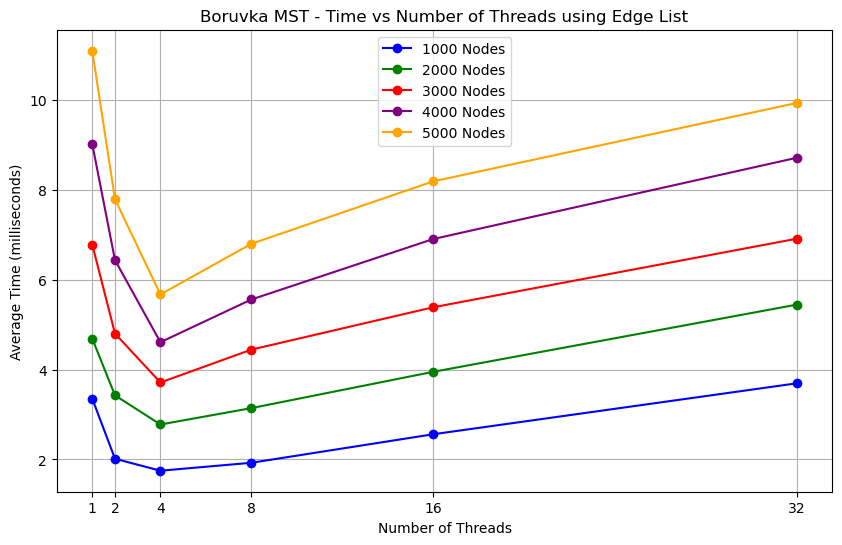

In [ ]:
# Now plot the graph
plt.figure(figsize=(10, 6))

# Set the colors for different input sizes
colors = ['blue', 'green', 'red', 'purple', 'orange']

for idx, input_size in enumerate(input_sizes):
    plt.plot(thread_counts, avg_times_ms[input_size], 
             marker='o', color=colors[idx], label=f"{input_size} Nodes")

plt.xlabel('Number of Threads')
plt.ylabel('Average Time (milliseconds)')
plt.title(f'Parallel Boruvka MST - Time vs Number of Threads using {Heading}')
plt.legend()
plt.grid(True)
plt.xticks(thread_counts)

# Show the plot
plt.show()


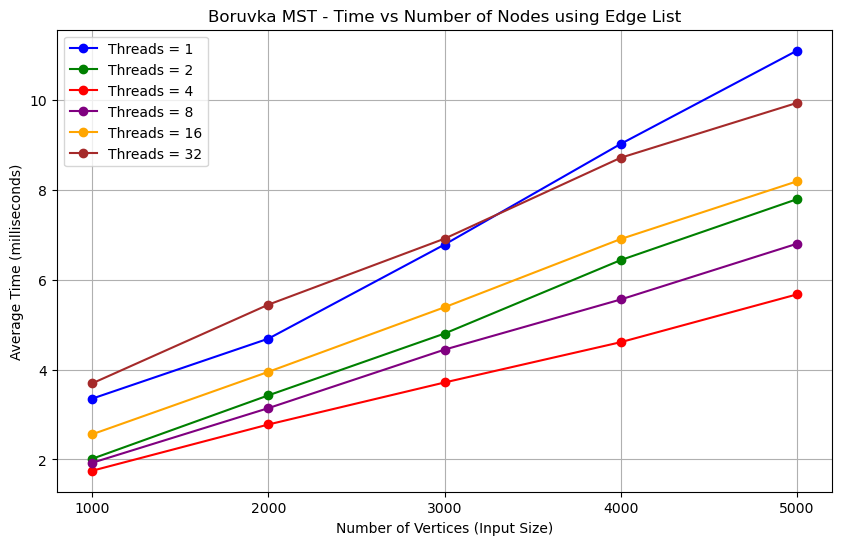

In [ ]:
# Now plot the graph for all thread values and varying input sizes
plt.figure(figsize=(10, 6))

# Set the colors for different threads
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Plot the graph for each thread count
for idx, thread_count in enumerate(thread_counts):
    avg_time_thread = [avg_times_ms[input_size][idx] for input_size in input_sizes]
    plt.plot(input_sizes, avg_time_thread, marker='o', color=colors[idx], label=f"Threads = {thread_count}")

plt.xlabel('Number of Vertices (Input Size)')
plt.ylabel('Average Time (milliseconds)')
plt.title(f'Parallel Boruvka MST - Time vs Number of Nodes using {Heading}')
plt.legend()
plt.grid(True)
plt.xticks(input_sizes)

# Show the plot
plt.show()


In [90]:
import os

os.remove(executable_filename)
os.remove(results_filename)
print(f"Cleaned up: Removed {executable_filename} and {results_filename}.")


Cleaned up: Removed Parallel-Boruvka-Edges.o and Parallel-Boruvka-Edges.results.
